# AIM: Visualize availability of volunteers on geographical map

Background:
- In crisis situation, organizations might require rapid and non-bureaucratic low-level support. This code aims at generating a geographical map with the available volunteers overlayed


Requirements:
- retrieve data via json API
    table of anonymized volunteers with postcode (PLZ), weekday, type (time range)
- PLZ coordinates in .xml downloaded from http://data.geo.admin.ch/ch.swisstopo-vd.ortschaftenverzeichnis_plz/data.zip (generalizeable to other countries??)




# Initialization
(install and import packages)

matplotlib

In [1]:
!pip install matplotlib

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


cartopy [https://scitools.org.uk/cartopy/docs/latest/installing.html#installing]

In [2]:
!conda install --yes -c conda-forge cartopy

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/conda/envs/python2

  added / updated specs:
    - cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aenum-2.2.0                |             py_0          79 KB  conda-forge
    backports-1.0              |             py_2           4 KB  conda-forge
    backports.functools_lru_cache-1.6.1|             py_0           8 KB  conda-forge
    backports_abc-0.5          |             py_1           5 KB  conda-forge
    cartopy-0.17.0      

aenum-2.2.0          | 79 KB     | ##################################### | 100% 
libwebp-base-1.1.0   | 845 KB    | ##################################### | 100% 
backports-1.0        | 4 KB      | ##################################### | 100% 
icu-58.2             | 22.6 MB   | ##################################### | 100% 
sip-4.19.8           | 290 KB    | ##################################### | 100% 
xorg-libxdmcp-1.1.3  | 18 KB     | ##################################### | 100% 
zstd-1.4.4           | 982 KB    | ##################################### | 100% 
libopenblas-0.3.7    | 7.6 MB    | ##################################### | 100% 
libtiff-4.1.0        | 668 KB    | ##################################### | 100% 
certifi-2019.11.28   | 149 KB    | ##################################### | 100% 
libpng-1.6.37        | 308 KB    | ##################################### | 100% 
backports.functools_ | 8 KB      | ##################################### | 100% 
futures-3.3.0        | 26 KB

In [ ]:
geopandas 

In [10]:
!pip install geopandas

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
     |████████████████████████████████| 921kB 2.7MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 4.4MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.1MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


## list python modules with version

In [ ]:
!pip freeze

# code

## reformat PLZ coordinates from .xml into centroid 

In [ ]:
def construct_poly(row):
    lest_x = row['Lest_X']
    lest_y = row['Lest_Y']
    splitted_x_list = lest_x.split("-")
    splitted_y_list = lest_y.split("-")
    lower_y = int(splitted_y_list[0])
    upper_y = int(splitted_y_list[1]) + 1
    lower_x = int(splitted_x_list[0])
    upper_x = int(splitted_x_list[1]) + 1
    lower_left_corner = (lower_y, lower_x)
    lower_right_corner = (lower_y, upper_x)
    upper_right_corner = (upper_y, upper_x)
    upper_left_corner = (upper_y, lower_x)
    poly = Polygon([lower_left_corner, lower_right_corner, upper_right_corner, upper_left_corner, lower_left_corner])
return poly

# import xml with PLZ coordinates into dataframe
df <- xml

df['geometry'] = df.apply(construct_poly, axis=1)

gdf_poly['centroids'] = gdf_poly.centroid

## read volunteer data via API .json

In [ ]:
import requests
import json

url = 'https://...'
r = requests.get(url)
# fake example:
print(json.loads(r.content))
4056   5   MONDAY     AFTERNOON
6010   0   WEDNESDAY  MORNING


## pre-processing: convert postcode to coordinates, normalization (?) and convert to color scale

## generate map

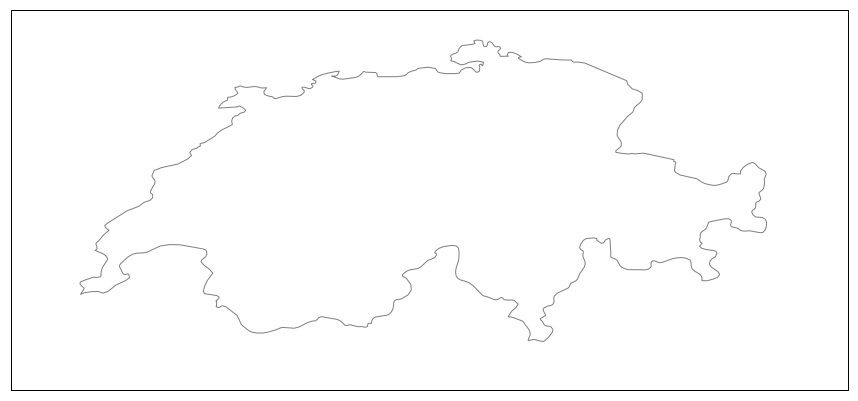

In [44]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.io import shapereader
from shapely.geometry import box, Polygon

# get natural earth data (http://www.naturalearthdata.com/)

# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'

shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
df = geopandas.read_file(shpfilename)

# read the Swiss borders
poly = df.loc[df['ADMIN'] == 'Switzerland']['geometry']
# read the german borders
#poly = df.loc[df['ADMIN'] == 'Germany']['geometry'].values[0]

# create a geodataframe from our dataframe 
# gdf_poly = gpd.GeoDataFrame(df, geometry='geometry', crs=from_epsg(3301))
# Create an empty geopandas GeoDataFrame
gdf_centroids = gpd.GeoDataFrame()
gdf_centroids['geometry'] = Polygon([(24.950899, 46.169158),(24.950899, 46.169158),(24.950899, 46.169158)])

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_geometries(poly, crs=ccrs.PlateCarree(), facecolor='none', 
                  edgecolor='0.5')
#ax.add_geometries(gdf_centroids)

ax.set_extent([5.5, 11, 45.5, 48], crs=ccrs.PlateCarree())


plt.show()

In [42]:
print(Polygon([(24.950899, 46.169158),(24.950899, 46.169158),(24.950899, 46.169158)]))

POLYGON ((24.950899 46.169158, 24.950899 46.169158, 24.950899 46.169158, 24.950899 46.169158))
